# Figure box-plot metrics

La idea es generar boxplot the las matricas de cada modelo al testear sobre distintos datasets.
Tambien generar una matris que nos muetre la comparacion entre modelos y testeo

A partir de las imagenes de segmentacion guardadas en la ruta *ODOC_segmentation/predicted* donde tengo la segmentacion del disco y la copa por separado con el mismo nombre de la imagen. separado pro datasets


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import glob
import ntpath
import pandas as pd
import imageio as io
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage import filters, measure

In [59]:
predict_path = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelM/'
data_path = '/mnt/Almacenamiento/ODOC_segmentation/data/'
dataset_predicted = 'DRISHTI'
dataset_to_train = 'DRISHTI'# 'DRIDHTI' 


In [60]:
def get_paths(data_pred,test=True):
    predicted_img_p = []
    predicted_OD_p = []
    predicted_ODint_p = []
    predicted_OC_p = []
    gt_OD_p = []
    gt_OC_p = []

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OC/*')):
        predicted_OC_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD/*')):
        predicted_OD_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD_int/*')):
        predicted_ODint_p.append(p)

    if test:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/Test/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/Test/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/Test/*')):
            gt_OD_p.append(p)
    else:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/*')):
            gt_OD_p.append(p)

    return predicted_OC_p, predicted_OD_p,predicted_ODint_p, gt_OC_p, gt_OD_p


In [61]:
def get_dice(pred, gt):
    return f1_score(gt.flatten(), pred.flatten(),pos_label=255)

def get_precision(pred, gt):
    return precision_score(gt.flatten(), pred.flatten(),pos_label=255)

def get_recall(pred, gt):
    return recall_score(gt.flatten(), pred.flatten(),pos_label=255)
        

In [89]:
def get_metrics(predicted_OC_p, predicted_OD_p,predicted_ODint_p, gt_OC_p, gt_OD_p):
    OD_dice = []
    ODint_dice = []
    OC_dice = []
    dice_avg = []
    OD_pr = []
    ODint_pr = []
    OC_pr = []
    OD_re = []
    ODint_re = []
    OC_re = []

    for idx in range(len(predicted_OC_p)):

        if gt_OC_p[idx] != '/mnt/Almacenamiento/ODOC_segmentation/data/OC/ORIGA/359.png':
        
            pred_OC = np.array(Image.open(predicted_OC_p[idx]))
            gt_OC = np.array(Image.open(gt_OC_p[idx]))

            pred_OD = np.array(Image.open(predicted_OD_p[idx]))
            w,h = pred_OD.shape
            # pred_ODint = np.array(Image.open(predicted_ODint_p[idx]))
            # pred_ODint = resize(pred_ODint,(w,h))

            
            # pred_ODint[pred_ODint > 0.5] = 255
            # pred_ODint[pred_ODint <= 0.5] = 0

            gt_OD = np.array(Image.open(gt_OD_p[idx]))

            dice_c =get_dice(pred_OC,gt_OC)
            dice_d = get_dice(pred_OD,gt_OD)
            #dice_dint = get_dice(pred_ODint,gt_OD)
            
            OC_dice.append(dice_c)
            OD_dice.append(dice_d)
            #ODint_dice.append(dice_dint)
            dice_avg.append((dice_c + dice_d) /2)

            OC_pr.append(get_precision(pred_OC,gt_OC))
            OD_pr.append(get_precision(pred_OD,gt_OD))
            #ODint_pr.append(get_precision(pred_ODint,gt_OD))

            OC_re.append(get_recall(pred_OC,gt_OC))
            OD_re.append(get_recall(pred_OD,gt_OD))
            #ODint_re.append(get_recall(pred_ODint,gt_OD))

    return OD_dice, ODint_dice, OC_dice, dice_avg, OD_pr, ODint_pr, OC_pr, OD_re, ODint_re, OC_re



In [105]:
p_OC_D, p_OD_D, p_ODint_D, gt_OC_D, gt_OD_D = get_paths('DRISHTI',test=True)
p_OC_R, p_OD_R, p_ODint_R, gt_OC_R, gt_OD_R = get_paths('REFUGE',test=True)
p_OC_O, p_OD_O, p_ODint_O, gt_OC_O, gt_OD_O = get_paths('ORIGA',test=False)
p_OC_R3, p_OD_R3, p_ODint_R3, gt_OC_R3, gt_OD_R3 = get_paths('RIM_ONE_R3',test=False)

In [91]:
OD_dice_D, ODint_dice_D, OC_dice_D, AVG_dice_D, OD_pr_D, ODint_pr_D, OC_pr_D, OD_re_D, ODint_re_D, OC_re_D = get_metrics(p_OC_D, p_OD_D, p_ODint_D, gt_OC_D, gt_OD_D)


In [ ]:
OD_dice_R, ODint_dice_R, OC_dice_R, AVG_dice_R, OD_pr_R, ODint_pr_R, OC_pr_R, OD_re_R, ODint_re_R, OC_re_R = get_metrics(p_OC_R, p_OD_R, p_ODint_R, gt_OC_R, gt_OD_R)


In [92]:
mean_OD_D = np.mean(OD_dice_D)
std_OD_D = np.std(OD_dice_D)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_D = np.mean(OC_dice_D)
std_OC_D = np.std(OC_dice_D)

print('DRISHTI: mean OD: ', mean_OD_D , std_OD_D, ' OC: ', mean_OC_D, std_OC_D )

DRISHTI: mean OD:  0.9430113714346396 0.024653589420938864  OC:  0.8301169752799916 0.11960911689401364


In [101]:
mean_OD_R = np.mean(OD_dice_R)
std_OD_R = np.std(OD_dice_R)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_R = np.mean(OC_dice_R)
std_OC_R = np.std(OC_dice_R)

print('REFUGE: mean OD: ', mean_OD_R , std_OD_R, ' OC: ', mean_OC_R, std_OC_R )

REFUGE: mean OD:  0.9139865864292588 0.04332301678388821  OC:  0.8053970385105989 0.10515722977589338


In [93]:

OD_dice_O, ODint_dice_O, OC_dice_O, AVG_dice_O, OD_pr_O, ODint_pr_O, OC_pr_O, OD_re_O, ODint_re_O, OC_re_O = get_metrics(p_OC_O, p_OD_O, p_ODint_O, gt_OC_O, gt_OD_O )
OD_dice_R3, ODint_dice_R3, OC_dice_R3, AVG_dice_R3, OD_pr_R3, ODint_pr_R3, OC_pr_R3, OD_re_R3, ODint_re_R3, OC_re_R3 = get_metrics(p_OC_R3, p_OD_R3, p_ODint_R3, gt_OC_R3, gt_OD_R3)





/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
mean_OD_O = np.mean(OD_dice_O)
std_OD_O = np.std(OD_dice_O)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_O = np.mean(OC_dice_O)
std_OC_O = np.std(OC_dice_O)

print('ORIGA: mean OD: ', mean_OD_O , std_OD_O, ' OC: ', mean_OC_O, std_OC_O )

ORIGA: mean OD:  0.9018277545942535 0.07388945461766576  OC:  0.7916544283018996 0.13175196946726345


In [104]:
mean_OD_R3 = np.mean(OD_dice_R3)
std_OD_R3 = np.std(OD_dice_R3)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_R3 = np.mean(OC_dice_R3)
std_OC_R3 = np.std(OC_dice_R3)

print('DRISHTI: mean OD: ', mean_OD_R3 , std_OD_R3, ' OC: ', mean_OC_R3, std_OC_R3 )

DRISHTI: mean OD:  0.8473379382737125 0.13394194102452797  OC:  0.6926784248327873 0.19439616926039477


In [94]:
DRISHTI_dice = {'avg_DICE': AVG_dice_D, 'OC_DICE': OC_dice_D, 'OD_DICE': OD_dice_D, 'PR OD':OD_pr_D, 'PR OC':OC_pr_D, 'RECALL OD':OD_re_D, 'RECALL OC':OC_re_D}
df_DRISHTI = pd.DataFrame(data=DRISHTI_dice)

REFUGE_dice = {'avg_DICE': AVG_dice_R, 'OC_DICE': OC_dice_R, 'OD_DICE': OD_dice_R, 'PR OD':OD_pr_R, 'PR OC':OC_pr_R, 'RECALL OD':OD_re_R, 'RECALL OC':OC_re_R}
df_REFUGE = pd.DataFrame(data=REFUGE_dice)

ORIGA_dice = {'avg_DICE': AVG_dice_O, 'OC_DICE': OC_dice_O, 'OD_DICE': OD_dice_O, 'PR OD':OD_pr_O, 'PR OC':OC_pr_O, 'RECALL OD':OD_re_O, 'RECALL OC':OC_re_O}
df_ORIGA = pd.DataFrame(data=ORIGA_dice)

RIMONE3_dice = {'avg_DICE': AVG_dice_R3, 'OC_DICE': OC_dice_R3, 'OD_DICE': OD_dice_R3, 'PR OD':OD_pr_R3, 'PR OC':OC_pr_R3, 'RECALL OD':OD_re_R3, 'RECALL OC':OC_re_R3}
df_RIMONE = pd.DataFrame(data=RIMONE3_dice)



df = {'DRISHTI':DRISHTI_dice, 'REFUGE': REFUGE_dice, 'RIM_ONE_R3': RIMONE3_dice}

In [142]:
df_DRISHTI.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of     avg_DICE   OC_DICE   OD_DICE     PR OD     PR OC  RECALL OD  RECALL OC
0   0.912701  0.886584  0.938818  0.890483  0.987579   0.992701   0.804330
1   0.842866  0.707605  0.978127  0.962238  1.000000   0.994550   0.547514
2   0.599336  0.357295  0.841377  0.989924  1.000000   0.731595   0.217504
3   0.778223  0.627187  0.929259  0.988563  1.000000   0.876667   0.456862
4   0.807846  0.667081  0.948610  0.918538  0.665219   0.980718   0.668954
5   0.894655  0.857744  0.931566  0.997224  0.993155   0.874020   0.754828
6   0.800166  0.861616  0.738716  0.604823  0.784323   0.948745   0.955809
7   0.857182  0.774945  0.939420  0.999969  1.000000   0.885785   0.632580
8   0.936723  0.892731  0.980715  0.979545  0.999206   0.981889   0.806762
9   0.890325  0.819085  0.961565  0.937781  0.953255   0.986586   0.718024
10  0.921063  0.911220  0.930906  0.884527  0.948050   0.982419   0.877145
11  0.459034  0.105583  0.812485  0.9

Text(0.5, 1.0, 'avg')

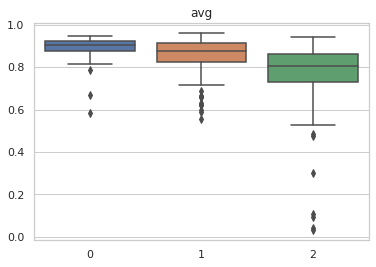

In [95]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(DRISHTI_dice['avg_DICE'],REFUGE_dice['avg_DICE'],RIMONE3_dice['avg_DICE']))
ax.set_title('avg')

Text(0.5, 1.0, 'DRISHTI')

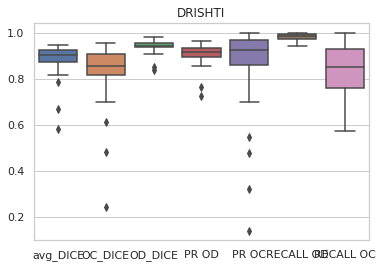

In [96]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_DRISHTI)
ax.set_title('DRISHTI')

Text(0.5, 1.0, 'REFUGE')

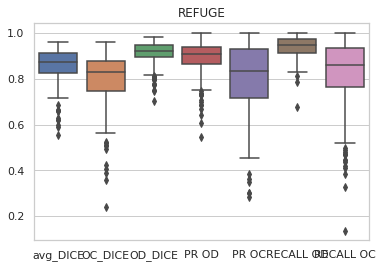

In [97]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_REFUGE)
ax.set_title('REFUGE')

Text(0.5, 1.0, 'ORIGA')

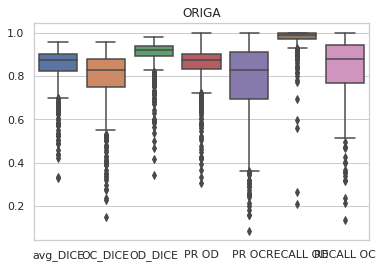

In [98]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_ORIGA)
ax.set_title('ORIGA')

In [99]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df)
ax.set_title('RIMEONE')

KeyError: 0